In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

In [2]:
PIC_NUMBER = 4
img1 = cv2.imread('../Images/7/Reference.bmp',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread(f'../Images/7/Attack 1/{PIC_NUMBER}.bmp',cv2.IMREAD_GRAYSCALE) # trainImage
original = cv2.imread(f'../Images/7/Original.bmp',cv2.IMREAD_GRAYSCALE) 


In [3]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)



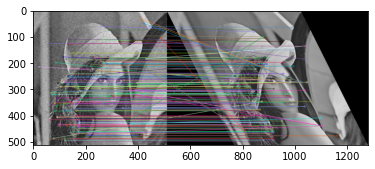

(<matplotlib.image.AxesImage at 0x7f305db66640>, None)

In [4]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
good_without_list = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        good_without_list.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

In [5]:
print(len(good_without_list))

160


[[ 1.00566856e+00 -5.01655917e-01 -5.16563884e-01]
 [ 6.10507851e-03  1.00727140e+00 -2.86476988e+00]
 [ 6.12531248e-06  6.86777176e-06  1.00000000e+00]]


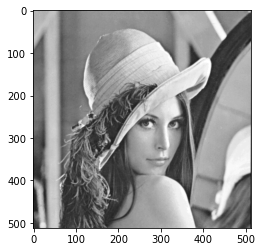

In [6]:
attack2_img3 = cv2.imread(f'../Images/7/Attack 2/{PIC_NUMBER}.bmp',cv2.IMREAD_GRAYSCALE)

# Convert point to numpy array:
dst_pts = np.float32([ kp1[m.queryIdx].pt for m in good_without_list ]).reshape(-1,1,2)
src_pts = np.float32([ kp2[m.trainIdx].pt for m in good_without_list ]).reshape(-1,1,2)
perspective_transform, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
print(perspective_transform)
result = cv2.warpPerspective(attack2_img3,perspective_transform ,original.shape )

cv2.imwrite(f"lena_reconstruct{PIC_NUMBER}.jpg", result)
# Function to remove black pixels:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]
plt.imshow(crop_image(result) , cmap="gray")

In [7]:
ssim_1 = ssim(result , original)
ssim_1

0.8968228483812762

In [8]:
mse1 = mse(result , original)
mse1

39.12124252319336

In [9]:
mse1 = mse(img1, original)
mse1

90.18267440795898

In [10]:
ssim_1 = ssim(img1, original)
ssim_1

0.7140990202582141